# **Exploratory Data Analysis (EDA) with Pandas in Banking**


The purpose of this project is to master the exploratory data analysis (EDA) in banking with Pandas framework.

Goals of the Project:

1.  Explore a banking dataset with Pandas framework.
2.  Build pivot tables.
3.  Visualize the dataset with various plot types.


## Outline


*   Materials and methods
*   General part
    *   Libraries import
    *   Dataset exploration
    *   Pivot tables
    *   Visualization in Pandas
*   Tasks


***


## Materials and methods


The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is publicly available for research. The details are described in \[Moro et al., 2014].

During the work, the task of preliminary analysis of a positive response (term deposit) to direct calls from a bank is to solve. In essence, the task is a matter of bank scoring, i.e. according to the characteristics of a client (potential client), their behavior is predicted (loan default, a wish to make a deposit, etc.).

In this project, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1.  What is the share of clients attracted in our source data?
2.  What are the mean values ​​of numerical features among the attracted clients?
3.  What is the average call duration for the attracted clients?
4.  What is the average age among the attracted and unmarried clients?
5.  What is the average age and call duration for different types of client employment?

In addition, we will make a visual analysis in order to plan marketing banking campaigns more effectively.


## Libraries import


Download data using a URL.


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-09-22 19:22:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [ <=>                ] 434.15K  2.38MB/s    in 0.2s    

2023-09-22 19:22:17 (2.38 MB/s) - ‘bank-additional.zip’ saved [444572]



Alternative URL for the dataset downloading.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip

--2022-04-19 05:12:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K  2.03MB/s    in 0.2s    

2022-04-19 05:12:55 (2.03 MB/s) - ‘bank-additional.zip.1’ saved [444572/444572]



In [2]:
!unzip -o -q bank-additional.zip

Importing the libraries necessary for this project. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [4]:
pd.options.display.float_format = '{:.2f}'.format

## Dataset exploration


In this section we will explore the sourse dataset.


Let's read the data and look at the first 5 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.


In [5]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
qualified_education = [edu for edu in df.education.unique() if edu!='unknown']
qualified_education

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'university.degree',
 'illiterate']

In [13]:
df[df.education.isin(qualified_education)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [15]:
df[df.education.isin(['professional.course','university.degree'])]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
25,35,technician,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


### Let's look at the dataset size, feature names and their types


In [16]:
df.shape
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (`y`).


### Attributing information


Output the column (feature) names:


In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

1.  `age` - client's age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5.  `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8.  `contact` - contact communication type (categorical: `cellular`, `telephone`)
9.  `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)


To see the general information on all the DataFrame features (columns), we use the **`info`** method:


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As we can see, the dataset is full, no pass (`non-null`), so there is no need to fill the gaps. The dataset contains 5 integer (`int64`), 5 real (`float64`) and 11 categorical and binary (`object`) features.


Method **`describe`** shows the main statistical characteristics of the dataset for each numerical feature (`int64` and `float64` types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.


In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


To see the statistics on non-numeric features, we need to explicitly specify the feature types by the `include` parameter. We can also set `include = all` to output statistics on all the existing features.


In [12]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The result shows that the average client refers to administrative staff (`job = admin.`), is married (`marital = married`) and has a university degree (`education = university.degree`).


For categorical (type `object`) and boolean (type `bool`) features you can use the **`value_counts`** method. Let's look at the target feature (`y`) distribution:


In [13]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [20]:
df["y"].value_counts(normalize=True)

no    0.89
yes   0.11
Name: y, dtype: float64

<AxesSubplot:>

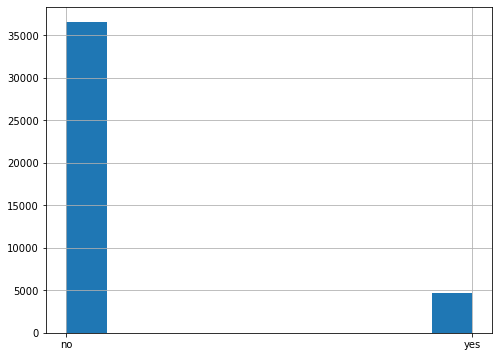

In [16]:
df.y.hist()

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable `y` equals `yes`.

Let's look at the client distribution by the variable `marital`. Specify the value of the `normalize = True` parameter to view relative frequencies, but not absolute.

In [ ]:
df["marital"].value_counts(normalize = True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

<AxesSubplot:>

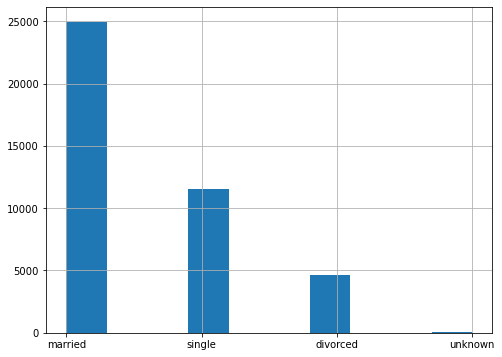

In [15]:
df["marital"].hist()

As we can see, 61% (0.61) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.


### Sorting


A `DataFrame` can be sorted by a few feature values. In our case, for example, by `duration` (`ascending = False` for sorting in descending order):


In [17]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


The sorting results show that the longest calls exceed one hour, as the value `duration` is more than 3600 seconds or 1 hour. At the same time, it usually was on Mondays and Thursdays (`day_of_week`) and, especially, in November and August (`month`).


Sort by the column group:


In [18]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


We see that the youngest customers are at the `age` of 17, and the call `duration` exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.


### Application of functions: `apply`, `map` etc.


**Apply the function to each column:**


In [19]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

The oldest client is 98 years old (`age` = 98), and the number of contacts with one of the customers reached 56 (`campaign` = 56).


**Apply the function to each column cell**


The `map` can also be used for **the values ​​replacement in a column** by passing it as an argument dictionary in form of ` {old_value: new_value}  `.

In [20]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


### Indexing and extracting data


A `DataFrame` can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple question examples.

We can use the code `dataframe ['name']` to extract a separate column. We use this to answer the question: **What is the share of clients attracted in our DataFrame?**


In [21]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


11,3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse.


Logical indexation by one column of a `DataFrame` is very convenient. It looks like this: `df [p(df['Name']]`, where`  p ` is a certain logical condition that is checked for each element of the `Name` column. The result of such an indexation is a `DataFrame` consisting only of the rows satisfying the condition `p` by the `Name` column.

We use this to answer the question: **What are the mean values ​​of numerical features among the attracted clients?**

In [22]:
df[df["y"] == 1].mean() 

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

Thus, the average age of the attracted clients is about 40 (`age` = 40.91), and 2 calls were required to attract them (`campaign` = 2.05).


Combining two previous types of indexation, we will answer the question: **What is the average call duration for the attracted clients**?


In [23]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes.


**What is the average age of attracted (`y == 1`) and unmarried (`'marital' == 'single'`) clients?**


In [24]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


The average age of unmarried attracted clients is 31, which should be considered when working with such clients.


If we need to get the first or last line of the DataFrame, we can use the code `df[:1]` or `df[-1:]`:


In [25]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


## Pivot tables


Suppose we want to see how observations in our sample are distributed in the context of two features - `y` and `marital`. To do this, we can build **cross tabulation** by the `crosstab` method.

In [26]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


The result shows that the number of attracted married clients is 2532 (`y = 1` for `married`) from the total number.


In [27]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


We see that more than half of the clients (61%, column `married`) are married and have not issued a deposit.


In `Pandas`, **pivot tables** are implemented by the method `pivot_table` with such parameters:

*   `values` – a list of variables to calculate the necessary statistics,
*   `index` – a list of variables to group data,
*   `aggfunc` — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

Let's find the average age and the call duration for different types of client employment `job`:


In [28]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


The obtained results allow us to plan marketing banking campaigns more effectively.


## Visualization in Pandas


Method **scatter_matrix** allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.


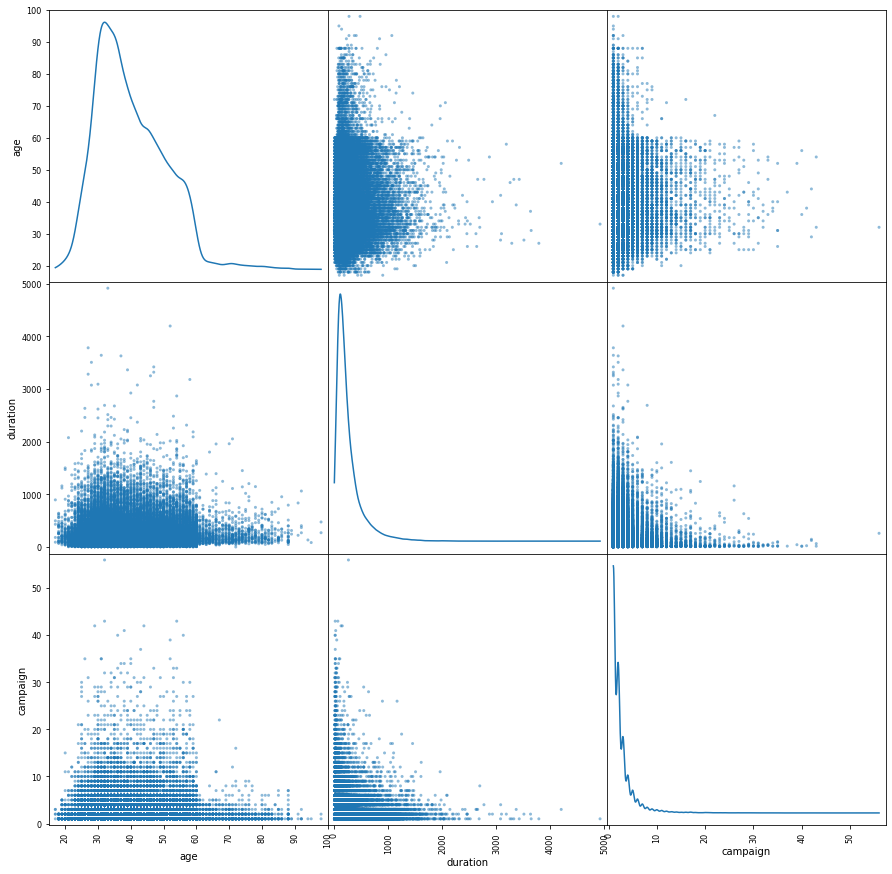

In [29]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other.
The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the [geometric distribution](https://en.wikipedia.org/wiki/geometric_distribution?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsEDA_Pandas_Banking_L126457256-2021-01-01) is more suitable.


**Now We will build a separate histogram for `age` feature:**


<AxesSubplot:>

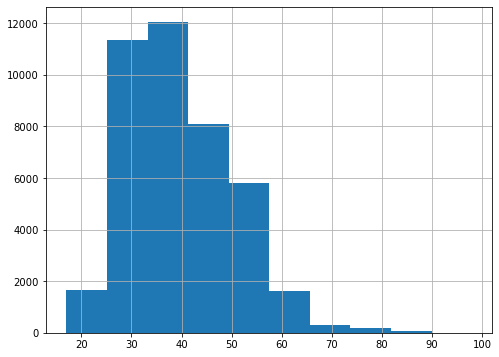

In [30]:
df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.


**Now we will build histogram for features all together:**


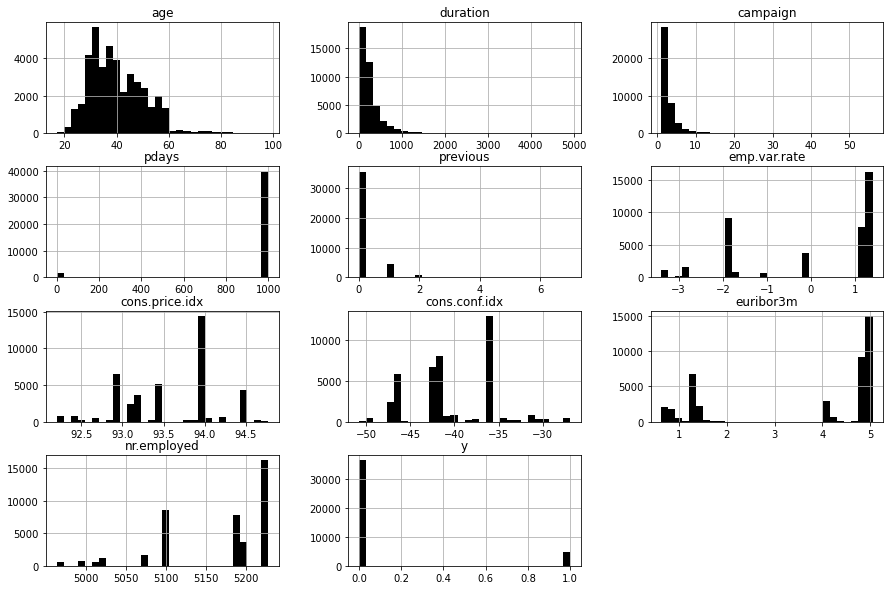

In [31]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.


Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).


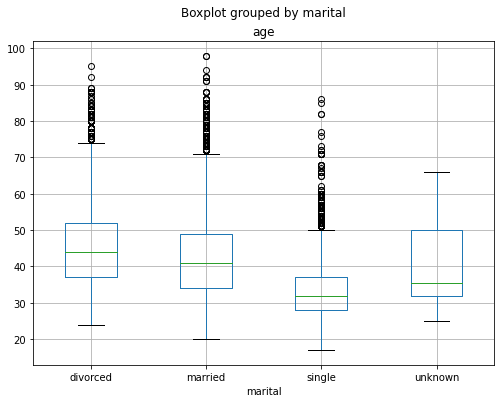

In [32]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.


**Now we will try to do this by data grouping on other features:**

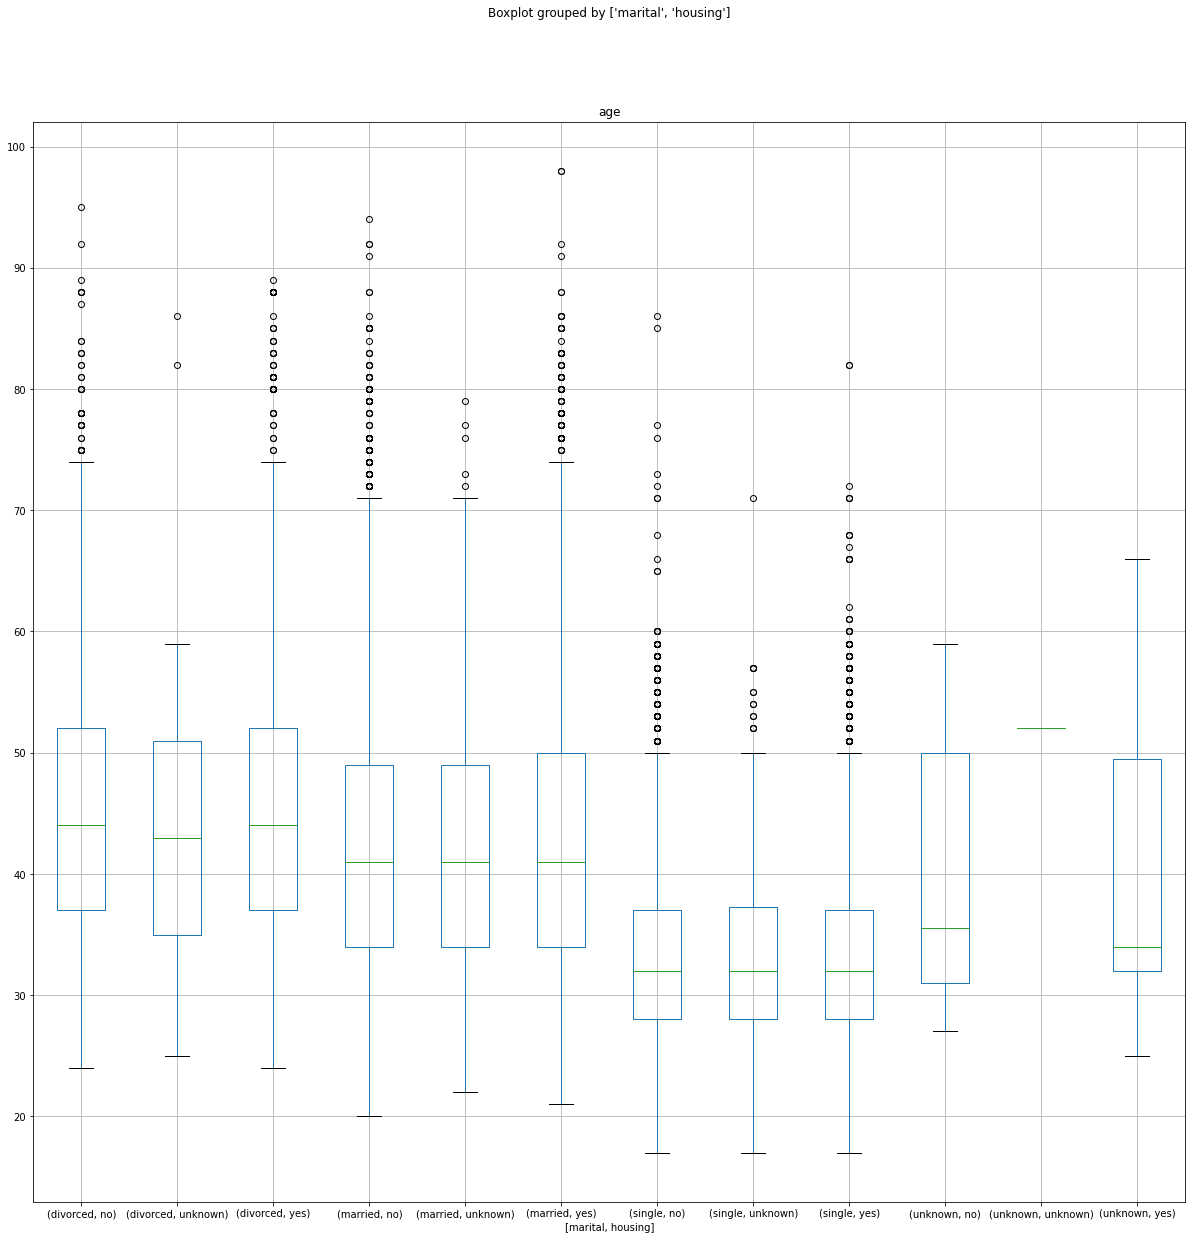

In [33]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))
plt.show()

As we can see, age and marital status do not have any significant influence on having a housing loan.



## Tasks


In this section, we will solve some tasks with the source bank dataset.


### Question 1


List of 10 clients with the largest number of contacts.


In [34]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


### Question 2


Determine the median age and the number of contacts for different levels of client education.


In [35]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)


mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

### Question 3


Output box plot to analyze the client age distribution by their education level.


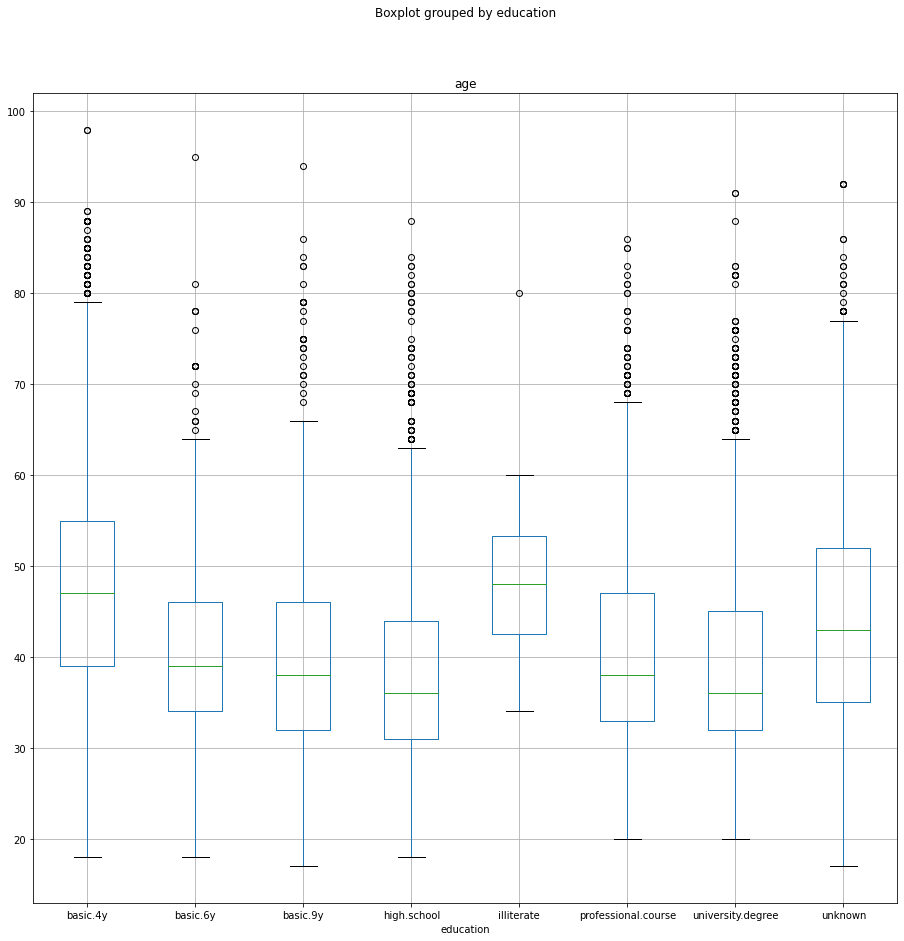

In [36]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()